# Summarizing the raw files

The 218 inverter data files from the SunPower data set contain data of unknown length and quality. Some files have data from 2014 through 2017, while other files represent systems built recently and have less than a year's worth of data. In addition, some sites have experienced outages (either PV or DAS) and are missing data. This notebook inspects summary data for all the files.

In [21]:
from core.preprocessing import summarize_files
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

In [2]:
path_to_files = '/Users/bennetmeyers/Documents/CS229/Project/data_dump/'

In [3]:
%time summary = summarize_files(path_to_files, suffix='pkl')

218 files to process
CPU times: user 27.4 s, sys: 6.82 s, total: 34.2 s
Wall time: 34.9 s


In [4]:
len(summary)

327

In [9]:
summary.head()

,index,t_start,t_end,num_vals,ac_max,ac_min,ac_avg,ac_stdev
0,001C4B0008A5_SPMS_001C4B001030,2014-01-01 00:06:50,2017-07-22 03:09:58,36683,4061.0,0.0,1261.932694,1068.083605
1,001C4B0008A5_SPMS_001C4B001069,2014-01-01 00:06:50,2017-07-22 03:09:58,29319,4062.0,0.0,1174.069579,989.235167
2,0022F2000C2D_SPMS_0022F2000C2D,2014-01-01 00:06:50,2017-07-22 00:48:49,62029,7061.0,0.0,2119.665415,1758.544032
3,0022F2000C2D_SPMS_0022F2000C8C,2014-01-01 00:06:50,2017-07-22 00:48:49,61535,4064.0,0.0,1424.010693,1175.636320
4,0022F200152D_SPMS_0022F2000CA3,2014-01-01 00:09:59,2014-08-18 17:22:30,9907,7066.0,0.0,2757.036136,2090.906490


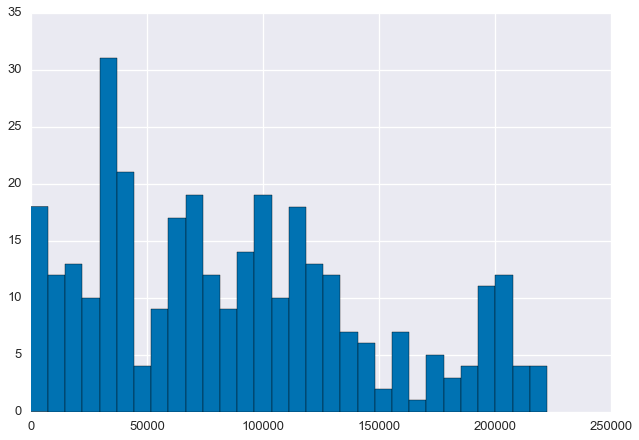

In [5]:
_ = plt.hist(summary['num_vals'], bins=30)

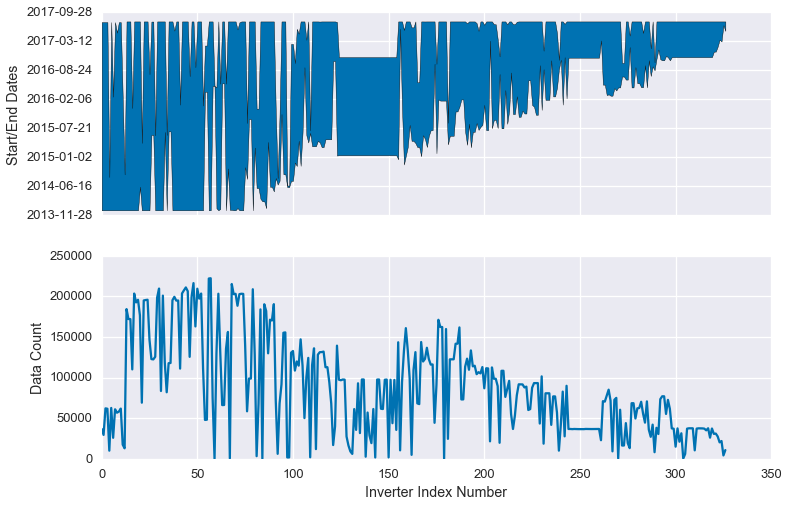

In [26]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8), sharex=True)
axes[0].fill_between(summary.index, date2num(list(summary['t_start'])), date2num(list(summary['t_end'])))
xfmt = DateFormatter('%Y-%m-%d')
axes[0].yaxis.set_major_formatter(xfmt)
axes[1].plot(summary.index, summary['num_vals'])
plt.xlabel('Inverter Index Number')
axes[0].set_ylabel('Start/End Dates')
axes[1].set_ylabel('Data Count')

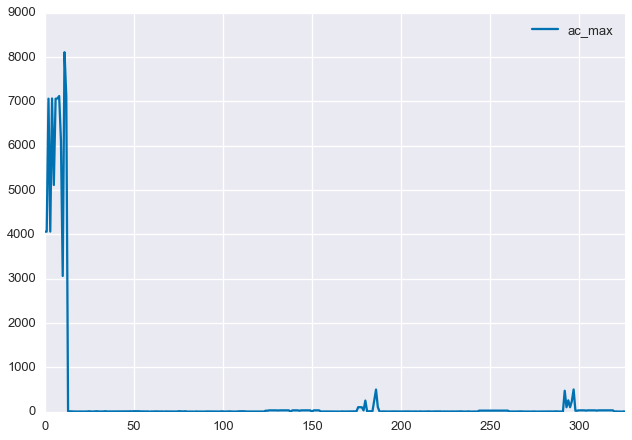

In [14]:
summary.plot(y='ac_max')